### Import dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import matplotlib.pyplot as plt
from sklearn import (datasets, feature_extraction, pipeline, linear_model,
metrics, model_selection, feature_selection)
import nltk


### Load in the data

In [46]:
data = 'Resources/mbti_clean.csv'
file = pd.read_csv(data)
display(file.head(5))
display(file.tail(5))

,type,posts
0,INFJ,The last thing INFJ friend posted his facebo...
1,INFJ,Hello ENFJ Sorry hear your distress Its only...
2,INFJ,Prozac wellbrutin least thirty minutes movin...
3,INFJ,Basically come with three items youve determi...
4,INFJ,All things moderation Sims indeed video ga...


,type,posts
283787,INFP,Tonight sit outside window the blackness n...
283788,INFP,was going close facebook few months back b...
283789,INFP,have seen and agree did actually think tha...
283790,INFP,have just watched Underworld Awakening and...
283791,INFP,would never want turn off emotions sometime...


### Remove stopwords

In [3]:
def remove_stopwords(post):
    tokenizer = RegexpTokenizer(r'\w+')
    words = [word.lower() for word in tokenizer.tokenize(post)]
    words = [word for word in words if word not in stopwords.words('english')]
    return np.array(words)
    

### Visualize distribution

In [51]:
# Explore the counts for each of these types
file['type'].value_counts()

INFP    60583
INFJ    50417
INTP    42071
INTJ    35109
ENFP    22361
ENTP    21922
ISTP    10404
ISFP     8089
ENTJ     7597
ISTJ     6679
ENFJ     6481
ISFJ     5435
ESTP     2697
ESFJ     1441
ESFP     1256
ESTJ     1250
Name: type, dtype: int64

<AxesSubplot:title={'center':'Distribution of the target variable'}, xlabel='type', ylabel='count'>

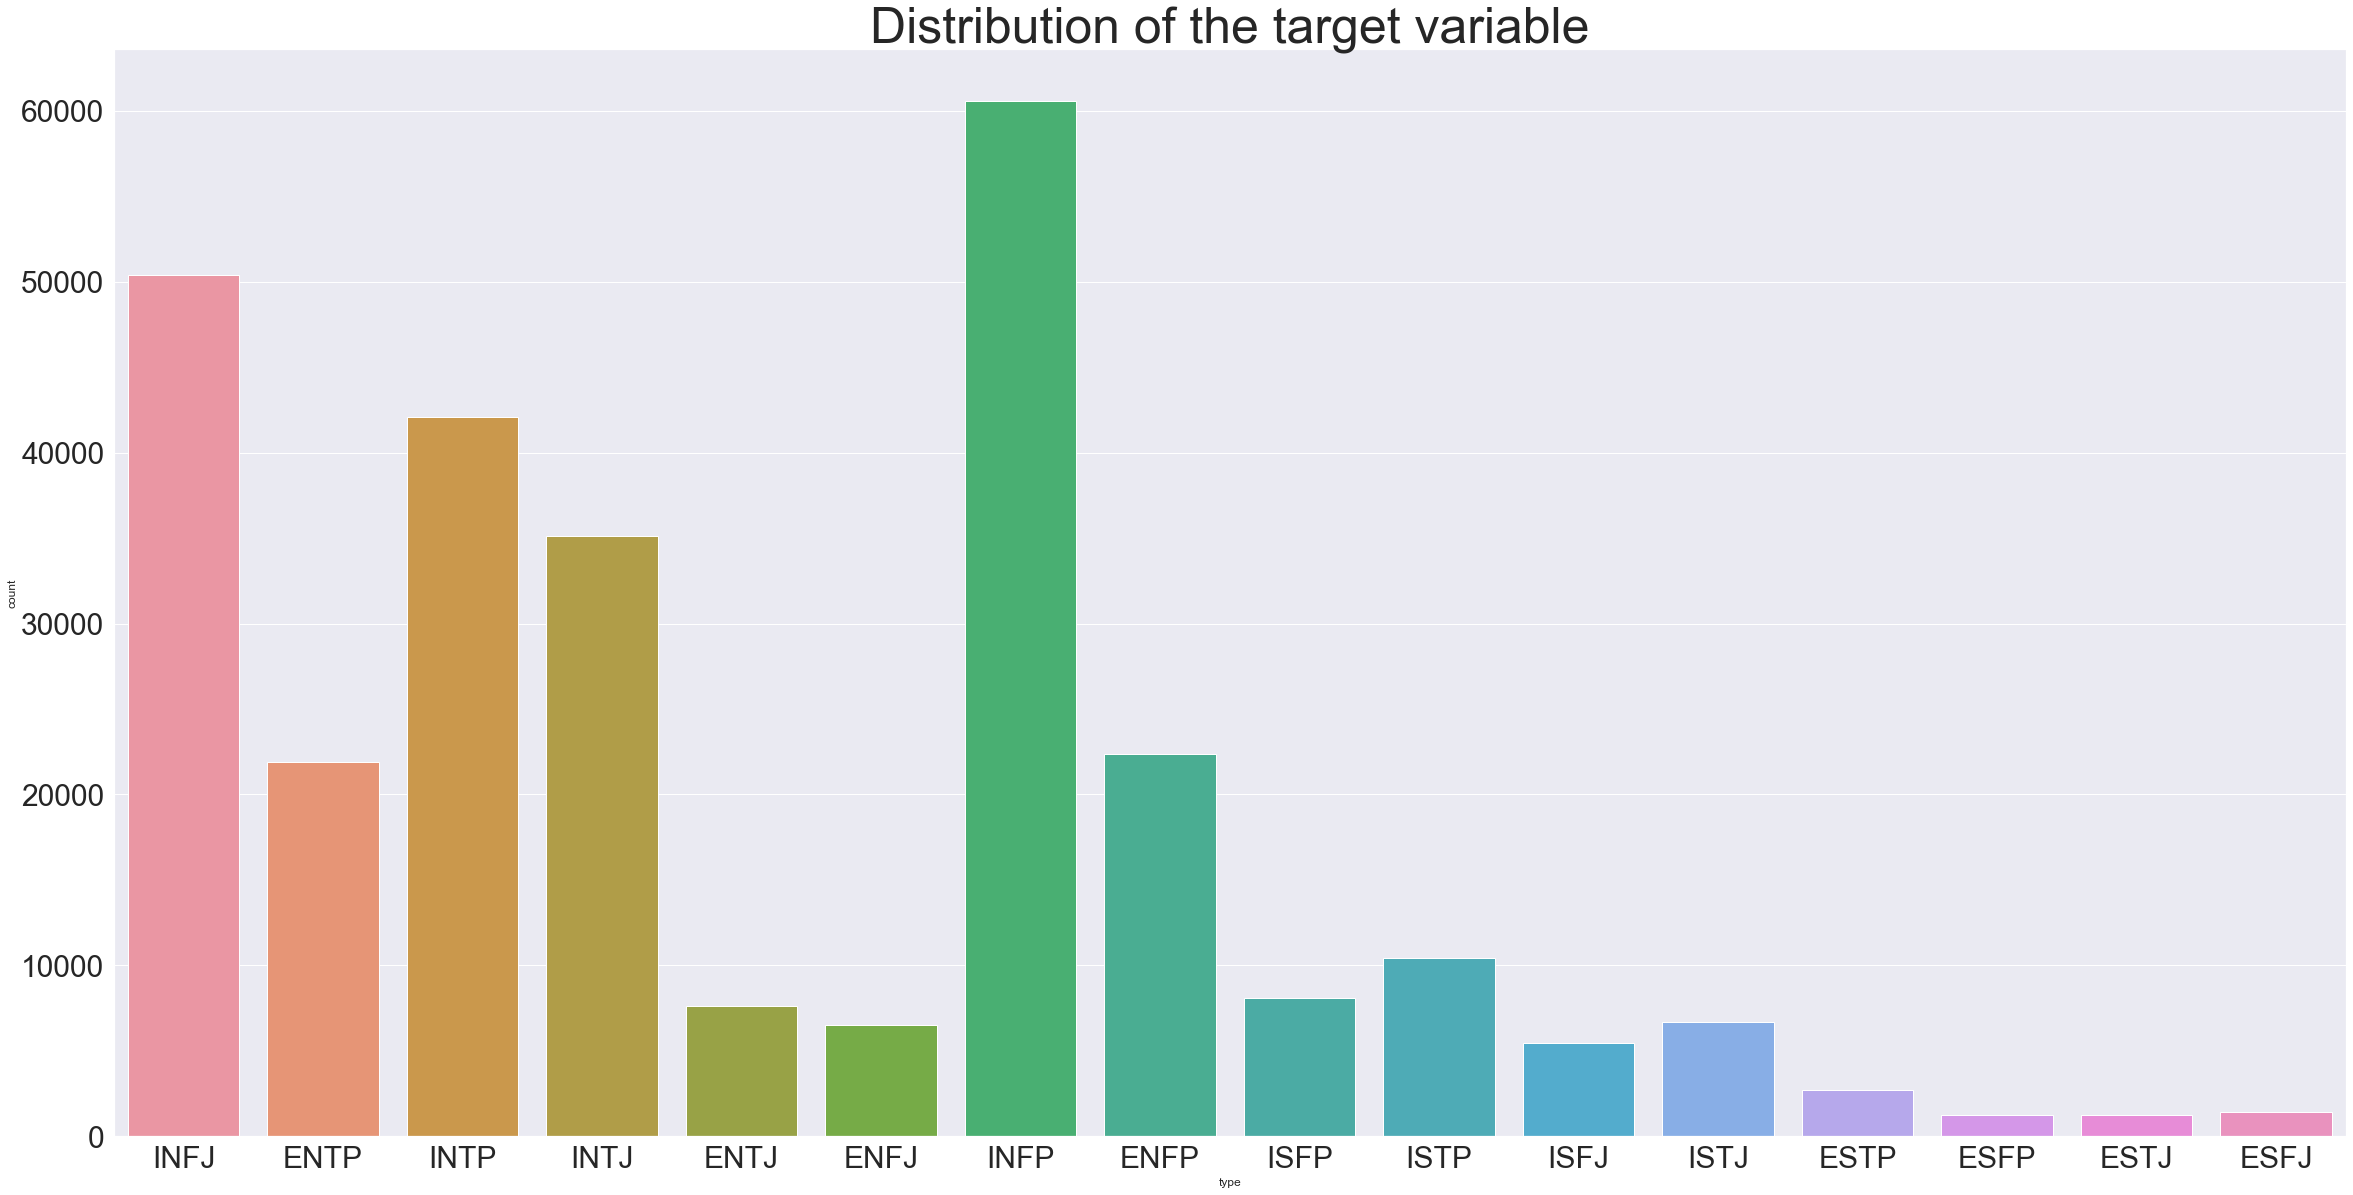

In [53]:
plt.figure(figsize=(40,20))
plt.title("Distribution of the target variable", fontsize=50)
plt.xticks(fontsize=30, rotation=0)
plt.yticks(fontsize=30, rotation=0)
sns.countplot(data=df, x='type')

In [4]:
X = df["posts"].apply(remove_stopwords).values
y = df["type"].values

### Split the dataset into training and testing sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
   y,  random_state=1, stratify=y)
X_train.shape

(212844,)

In [6]:
y_train.shape

(212844,)

### Create a datapipeline 

In [24]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = pipeline.Pipeline([('vect', feature_extraction.text.CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)),
                         ('tfidf', feature_extraction.text.TfidfTransformer()),
                         ('chi2', feature_selection.SelectKBest(feature_selection.chi2, k='all')),
                         ('clf', linear_model.SGDClassifier(random_state=42, loss='hinge', alpha=1e-3, verbose=5, max_iter=1000)),
                        ])

text_clf_svm = text_clf_svm.fit(X_train, y_train)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.24, NNZs: 14824, Bias: -1.003260, T: 212844, Avg. loss: 0.046076
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.18, NNZs: 17948, Bias: -1.001886, T: 425688, Avg. loss: 0.045727
Total training time: 0.07 seconds.
-- Epoch 3
Norm: 0.16, NNZs: 20608, Bias: -1.001478, T: 638532, Avg. loss: 0.045702
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 0.14, NNZs: 22762, Bias: -1.001188, T: 851376, Avg. loss: 0.045692
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 0.14, NNZs: 24521, Bias: -1.001055, T: 1064220, Avg. loss: 0.045686
Total training time: 0.18 seconds.
-- Epoch 6
Norm: 0.13, NNZs: 25956, Bias: -1.000949, T: 1277064, Avg. loss: 0.045683
Total training time: 0.22 seconds.
Convergence after 6 epochs took 0.22 seconds
-- Epoch 1
Norm: 0.41, NNZs: 32858, Bias: -1.003228, T: 212844, Avg. loss: 0.159039
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.31, NNZs: 39810, Bias: -1.001539, T: 425688, Avg. loss: 0.157770
Total training time: 0.08 seconds.
-

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


Norm: 0.24, NNZs: 51939, Bias: -1.000520, T: 1064220, Avg. loss: 0.157623
Total training time: 0.20 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 54477, Bias: -1.000511, T: 1277064, Avg. loss: 0.157611
Total training time: 0.25 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 56485, Bias: -1.000513, T: 1489908, Avg. loss: 0.157602
Total training time: 0.29 seconds.
Convergence after 7 epochs took 0.29 seconds
-- Epoch 1
Norm: 0.26, NNZs: 17725, Bias: -1.002491, T: 212844, Avg. loss: 0.054009
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.20, NNZs: 21546, Bias: -1.001651, T: 425688, Avg. loss: 0.053598
Total training time: 0.07 seconds.
-- Epoch 3


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


Norm: 0.17, NNZs: 24625, Bias: -1.001203, T: 638532, Avg. loss: 0.053569
Total training time: 0.11 seconds.
-- Epoch 4
Norm: 0.16, NNZs: 27098, Bias: -1.001062, T: 851376, Avg. loss: 0.053558
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 0.15, NNZs: 29121, Bias: -1.000992, T: 1064220, Avg. loss: 0.053551
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 0.15, NNZs: 30749, Bias: -1.000812, T: 1277064, Avg. loss: 0.053547
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.23 seconds
-- Epoch 1
Norm: 0.41, NNZs: 34660, Bias: -1.002429, T: 212844, Avg. loss: 0.155819
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.32, NNZs: 41780, Bias: -1.001416, T: 425688, Avg. loss: 0.154660
Total training time: 0.07 seconds.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


-- Epoch 3
Norm: 0.28, NNZs: 47047, Bias: -1.000755, T: 638532, Avg. loss: 0.154573
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.26, NNZs: 51110, Bias: -1.000760, T: 851376, Avg. loss: 0.154539
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 0.25, NNZs: 54071, Bias: -1.000611, T: 1064220, Avg. loss: 0.154519
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 0.24, NNZs: 56495, Bias: -1.000487, T: 1277064, Avg. loss: 0.154507
Total training time: 0.24 seconds.
-- Epoch 7
Norm: 0.23, NNZs: 58542, Bias: -1.000370, T: 1489908, Avg. loss: 0.154499
Total training time: 0.28 seconds.
Convergence after 7 epochs took 0.28 seconds
-- Epoch 1
Norm: 0.13, NNZs: 5301, Bias: -1.005974, T: 212844, Avg. loss: 0.010284
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 6225, Bias: -1.002984, T: 425688, Avg. loss: 0.010167
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 7136, Bias: -1.002277, T: 638532, Avg. loss: 0.010162
Total training time: 0.11 seconds.
-- 

[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


Norm: 0.07, NNZs: 9280, Bias: -1.001363, T: 1277064, Avg. loss: 0.010158
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.23 seconds
-- Epoch 1
Norm: 0.12, NNZs: 5640, Bias: -1.003453, T: 212844, Avg. loss: 0.008945
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 0.10, NNZs: 6925, Bias: -1.002232, T: 425688, Avg. loss: 0.008858
Total training time: 0.08 seconds.
-- Epoch 3
Norm: 0.09, NNZs: 8019, Bias: -1.001635, T: 638532, Avg. loss: 0.008854
Total training time: 0.12 seconds.
-- Epoch 4
Norm: 0.08, NNZs: 8967, Bias: -1.001361, T: 851376, Avg. loss: 0.008852
Total training time: 0.15 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 9784, Bias: -1.001132, T: 1064220, Avg. loss: 0.008851
Total training time: 0.19 seconds.
-- Epoch 6
Norm: 0.07, NNZs: 10567, Bias: -1.001082, T: 1277064, Avg. loss: 0.008851
Total training time: 0.23 seconds.
Convergence after 6 epochs took 0.23 seconds
-- Epoch 1
Norm: 0.13, NNZs: 5578, Bias: -1.003804, T: 212844, Avg. loss: 0.008903
Total tr

Norm: 0.30, NNZs: 21437, Bias: -1.002693, T: 212844, Avg. loss: 0.073925
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 0.23, NNZs: 26157, Bias: -1.001767, T: 425688, Avg. loss: 0.073400
Total training time: 0.09 seconds.
-- Epoch 3
Norm: 0.20, NNZs: 29766, Bias: -1.001309, T: 638532, Avg. loss: 0.073361
Total training time: 0.14 seconds.
-- Epoch 4
Norm: 0.18, NNZs: 32593, Bias: -1.001028, T: 851376, Avg. loss: 0.073345
Total training time: 0.18 seconds.
-- Epoch 5
Norm: 0.17, NNZs: 34833, Bias: -1.000802, T: 1064220, Avg. loss: 0.073335
Total training time: 0.22 seconds.
-- Epoch 6
Norm: 0.17, NNZs: 36605, Bias: -1.000827, T: 1277064, Avg. loss: 0.073330
Total training time: 0.27 seconds.
Convergence after 6 epochs took 0.27 seconds


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.3s finished


In [25]:
predicted_svm = text_clf_svm.predict(X_test)
np.mean(predicted_svm == y_test)

0.2492388791791171

### Stats for SVM

In [15]:
predicted_svm = text_clf_svm.predict(X_test)
print("Training set score: %f" % text_clf_svm.score(X_train, y_train))
print("Test set score: %f" % text_clf_svm.score(X_test, y_test))
print("Test error rate: %f" % (1 - text_clf_svm.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points for the Linear SVM algorithm: %d"
% (X_test.shape[0],(y_test != predicted_svm).sum()))

Training set score: 0.538653
Test set score: 0.249239
Test error rate: 0.750761
Number of mislabeled points out of a total 70948 points for the Linear SVM algorithm: 53265


### Create dataframe of actual vs predictions

In [9]:
y_pred = predicted_svm
results = pd.DataFrame({
   "Prediction": y_pred,
   "Actual": y_test
}).reset_index(drop=True)
display(results.head(10))


,Prediction,Actual
0,ENTP,ENTP
1,INFJ,INTJ
2,INFJ,ISFP
3,INTJ,INFJ
4,INFP,INTP
5,INFJ,INFP
6,ISTP,ISFP
7,INFP,INFJ
8,INFJ,INFJ
9,INFP,INTP


### Accuracy Score

In [10]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.24798443930766195

### Confusion Matrix

In [57]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 146  101   35   98   14    3    4    9  291  475  150  166   22   27
    24   55]
 [  99  840  123  335   50   27   15   36  849 1619  586  582   72   99
    74  184]
 [  37  127  151  150   18    5    5    6  279  454  246  282   16   42
    28   53]
 [  95  291  122  913   26   26   21   39  786 1285  644  820   61   96
    73  183]
 [   9   21   11   19   16    2    2    1   60   85   39   65    6   10
     5    9]
 [   9   32   11   20    9    7    0    7   48   70   36   40    5    7
     3   10]
 [   7   11    4   14    3    1   15    3   55   92   34   48    2   11
     5    8]
 [   9   48   21   60    8    6    5   35   98  162   69   85    6   20
     9   33]
 [ 239  638  243  685   64   45   53   52 3490 3587 1248 1418  155  218
   157  312]
 [ 262  748  278  712   98   59   52   68 2269 6588 1303 1741  152  244
   177  395]
 [ 144  418  215  544   57   30   41   36 1263 2041 1888 1444   92  152
   120  292]
 [ 176  434  214  699   58   40   35   58 1413 2568 1262 2786   9

### Classification report

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        ENFJ       0.11      0.09      0.10      1620
        ENFP       0.20      0.15      0.17      5590
        ENTJ       0.09      0.08      0.09      1899
        ENTP       0.19      0.17      0.18      5481
        ESFJ       0.03      0.04      0.04       360
        ESFP       0.02      0.02      0.02       314
        ESTJ       0.05      0.05      0.05       313
        ESTP       0.09      0.05      0.07       674
        INFJ       0.29      0.28      0.28     12604
        INFP       0.31      0.43      0.36     15146
        INTJ       0.23      0.22      0.22      8777
        INTP       0.26      0.26      0.26     10518
        ISFJ       0.15      0.10      0.12      1359
        ISFP       0.11      0.08      0.09      2022
        ISTJ       0.12      0.07      0.09      1670
        ISTP       0.13      0.12      0.12      2601

    accuracy                           0.25     70948
   macro avg       0.15   

### Prepare data for heatmapping

In [12]:
cm_svm = np.array(confusion_matrix(y_test, y_pred))
cm_svm_df = pd.DataFrame(cm_svm, index=['ENFJ', 'ENFP', 'ENTJ', 'ENTP', 'ESFJ', 'ESFP',
                                       'ESTJ', 'ESTP', 'INFJ', 'INFP', 'INTJ', 'INTP',
                                       'ISFJ', 'ISFP', 'ISTJ', 'ISTP'], 
                            columns=['predict_ENFJ','predict_ENFP','predict_ENTJ',
                                     'predict_ENTP','predict_ESFJ','predict_ESFP',
                                     'predict_ESTJ','predict_ESTP','predict_INFJ',
                                     'predict_INFP','predict_INTJ','predict_INTP',
                                     'predict_ISFJ','predict_ISFP','predict_ISTJ',
                                     'predict_ISTP'])

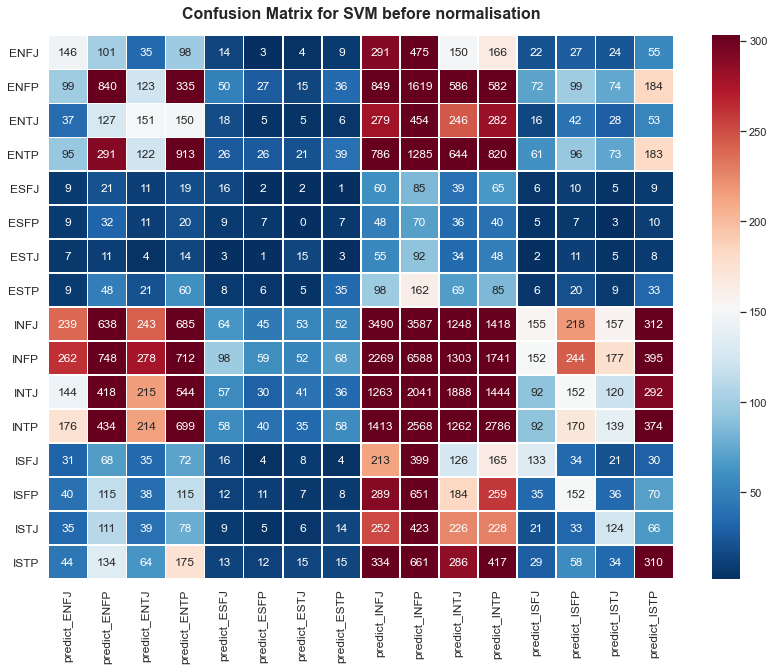

In [58]:

fig, ax = plt.subplots(figsize=(14,10)) 
plt.title('Confusion Matrix for SVM before normalisation', fontsize=16,
          fontweight='bold', y=1.02)
sns.heatmap(cm_svm_df, robust=True, annot=True, linewidth=0.5, 
            fmt='', cmap='RdBu_r', vmax=303, ax=ax)
plt.xticks(fontsize=12)
plt.yticks(rotation=0, fontsize=12);

### Normalize the data for better understanding

In [55]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
labels = np.unique(y_test)
result = confusion_matrix(y_test, y_pred, labels=labels, normalize='true')

In [56]:
plot_confusion_matrix

<function sklearn.metrics._plot.confusion_matrix.plot_confusion_matrix(estimator, X, y_true, *, labels=None, sample_weight=None, normalize=None, display_labels=None, include_values=True, xticks_rotation='horizontal', values_format=None, cmap='viridis', ax=None)>

### Plot normalized classification report

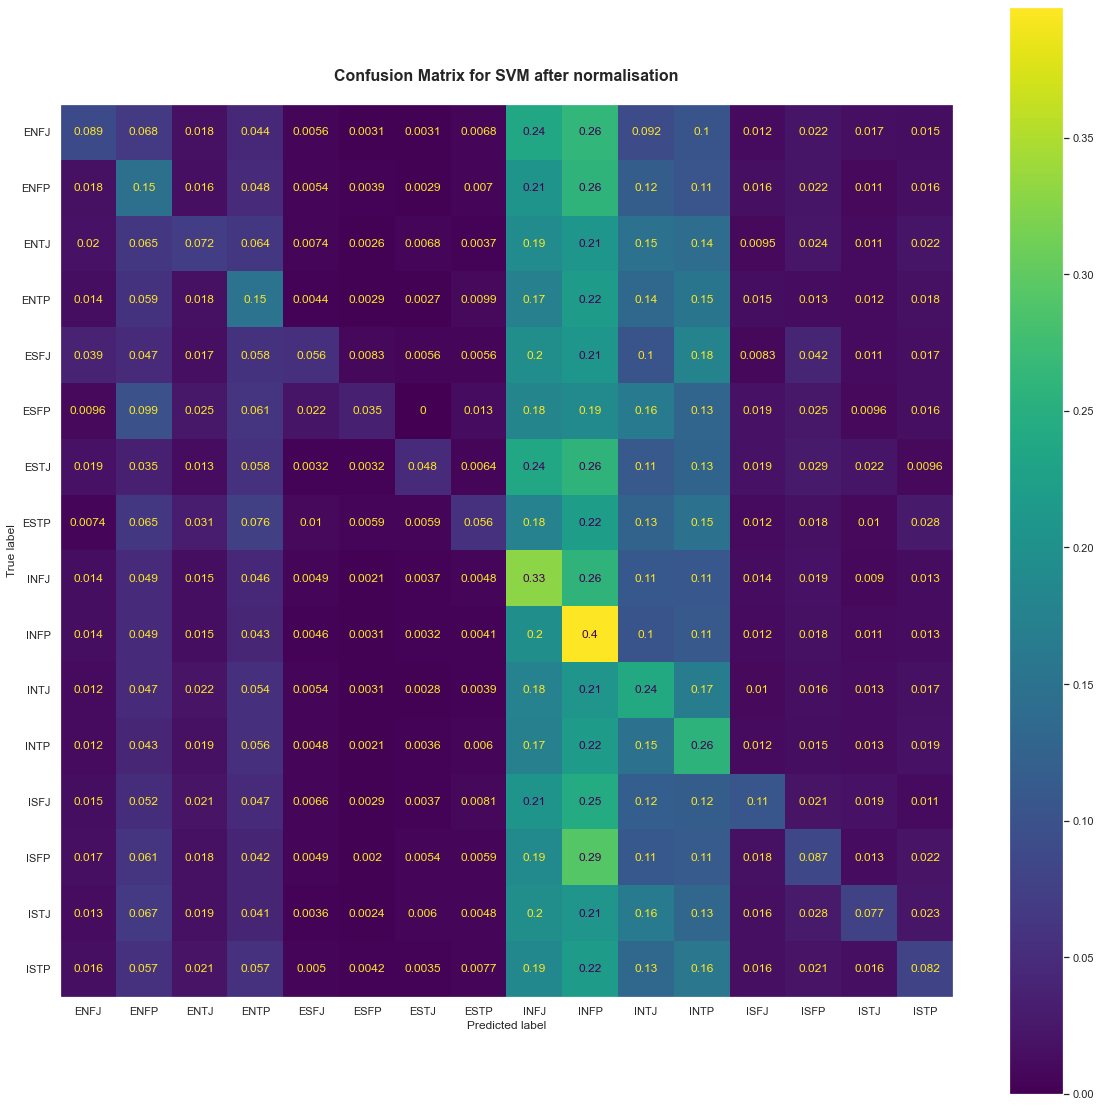

In [54]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.title('Confusion Matrix for SVM after normalisation', fontsize=16,
          fontweight='bold', y=1.02)
ax.grid(False)
plot_confusion_matrix(
    estimator=text_clf_svm,
    X=X_test,
    y_true=y_test,
    labels=labels,
    normalize='true',
    ax=ax
)